# Trusted zone - Household

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os, sys
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils import  DBtable_to_df

In [2]:
df = DBtable_to_df('../../household.duckdb','household')

## Missing values

we check if there are null values with `isnull().sum()`, and as we can see none of the columns have null values, so it could be the case that these missing values were hidden.

In [3]:
df.isnull().sum()  # there are no missing values is empty

section                                                                   0
single_women_aged_16_to_64                                                0
single_men_aged_16_to_64                                                  0
single_women_aged_65_or_over                                              0
single_men_aged_65_or_over                                                0
adult_women_with_one_or_more_minors                                       0
adult_men_with_one_or_more_minors                                         0
two_adults_from_16_to_64_and_without_minors                               0
two_adults_one_at_least_65_and_without_minors                             0
two_adults_and_one_minor                                                  0
two_adults_and_two_minors                                                 0
two_adults_and_three_or_more_minors                                       0
two_adults_over_35_and_one_adult_from_16_to_34                            0
two_adults_o

In the profiling we already saw the maximum and minimum values, and in the maximum values we did not see any inconsistency (we did not find any 9999999999), but in the minimum values we saw that there were a few zeros, so the null values could be hidden here.

In [4]:
dftmp = df.replace(0,np.nan)
print(dftmp.isnull().sum())
count = dftmp.isnull().mean()


section                                                                      0
single_women_aged_16_to_64                                                   0
single_men_aged_16_to_64                                                     0
single_women_aged_65_or_over                                                 0
single_men_aged_65_or_over                                                   7
adult_women_with_one_or_more_minors                                         18
adult_men_with_one_or_more_minors                                         1648
two_adults_from_16_to_64_and_without_minors                                  0
two_adults_one_at_least_65_and_without_minors                                0
two_adults_and_one_minor                                                     1
two_adults_and_two_minors                                                    0
two_adults_and_three_or_more_minors                                        327
two_adults_over_35_and_one_adult_from_16_to_34      

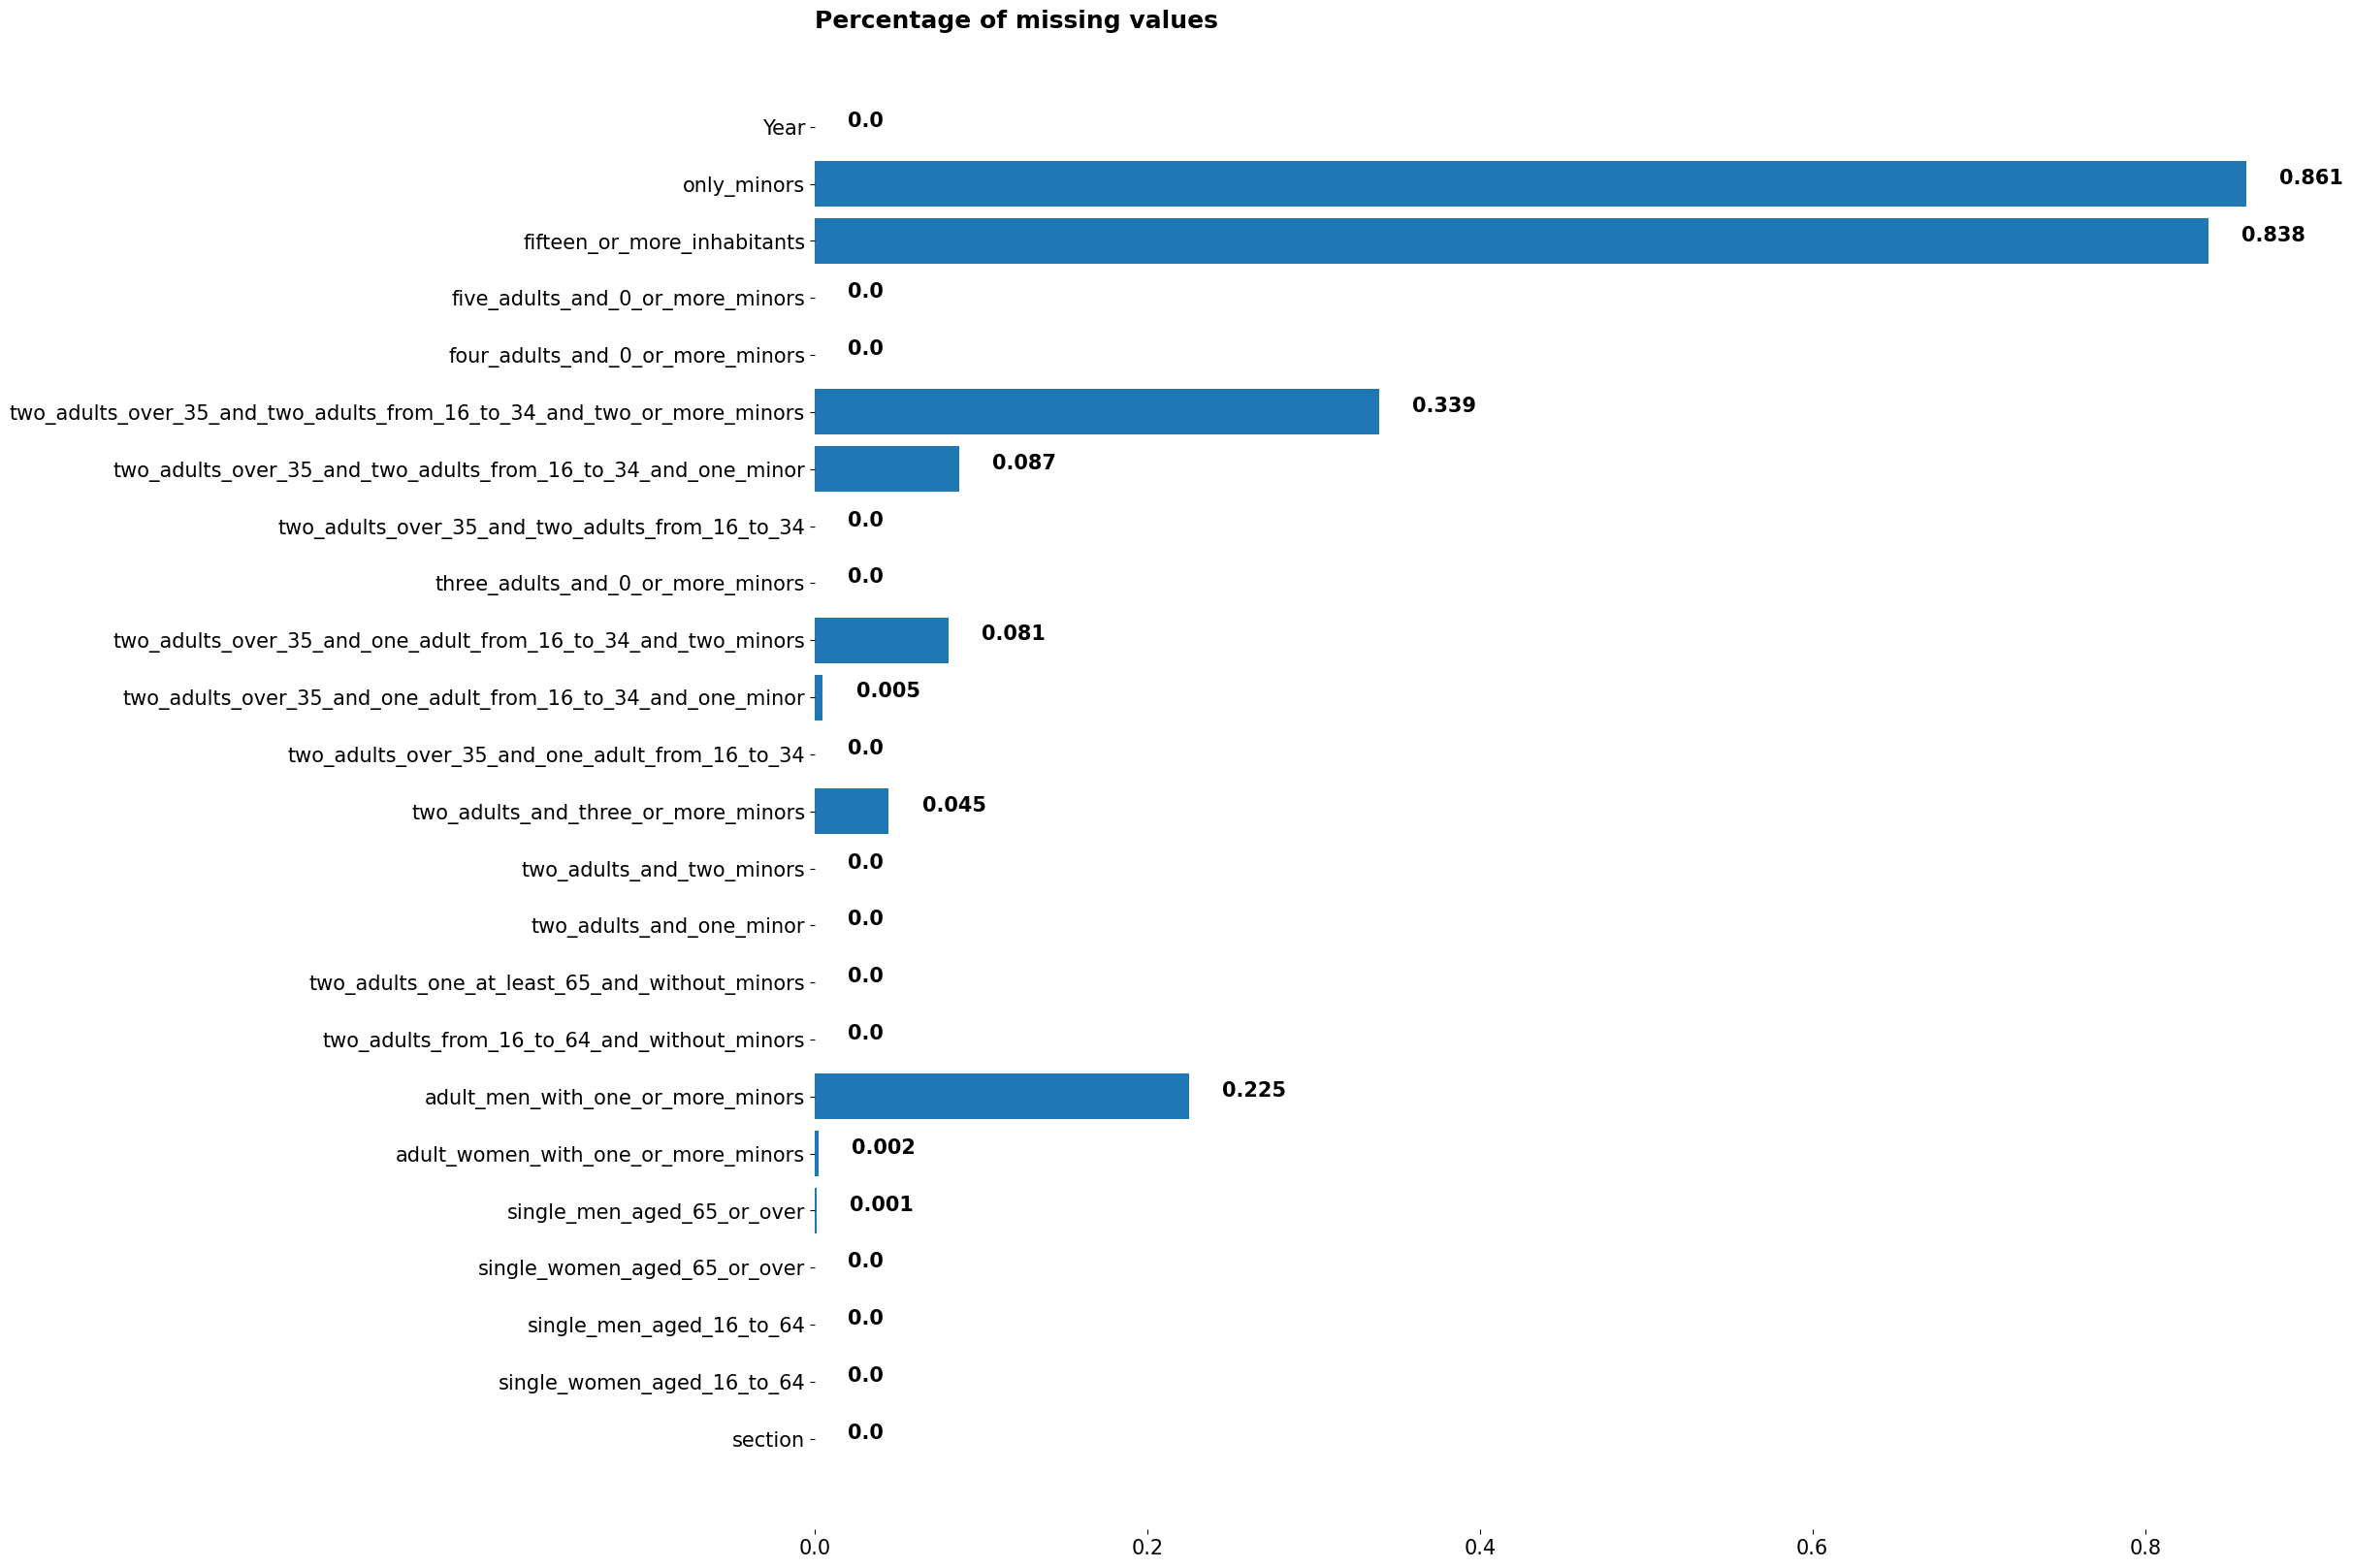

In [5]:
fig, ax = plt.subplots(figsize =(20, 20))
ax.barh(df.columns,count)

for s in ['top', 'bottom', 'left', 'right']: # Remove axes splines
    ax.spines[s].set_visible(False)

for i in ax.patches: # Add annotation to bars
    plt.text(i.get_width()+0.02, i.get_y()+0.4, str(round((i.get_width()), 3)), fontsize = 15, fontweight ='bold')

ax.set_title('Percentage of missing values', loc ='left', fontsize=18,fontweight='bold' )
ax.tick_params(axis = 'both', labelsize=15)
plt.show()

The graph above shows us in percentage the number of zeros that exist in the columns.

The columns with a higher percentage (grater than 25%) are `only_minors` with 86.1%, `fifteen_or_more_inhabitants` with 83.8% and `two_adults_over_35_and_two_adults_from_16_to_34_and_two_or_more_minors` with 33.9%. All these values do not seem to be null, since these situations are rare and it is logical  not to find this type of distribution in Spain households.

Although it is rare that there are so many zeros in `adult_men_with_one_or_more_minors` compared to `adult_women_with_one_or_more_minors`, where the first has a percentage of 22.5% and the second one with 0.2%. It is quite surprising that there are not similar. However, it is said that children are usually more affectionate towards women so we have decided not to impute it since this social prejudice could be true.

Regarding the rest they seems quite cohherents in our context.